Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.


https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

In [2]:
#Importamos los datos
# 
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

In [3]:
# Exploración de los datos

df.head()

,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


Definición de Latitud y Longitud

Latitud Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

Longitud: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.


In [5]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron.

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

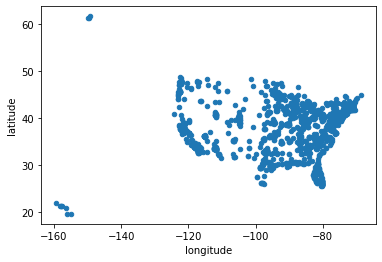

In [6]:
latlong.plot.scatter( "longitude","latitude")

In [7]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.



In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [9]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [10]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [11]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [12]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

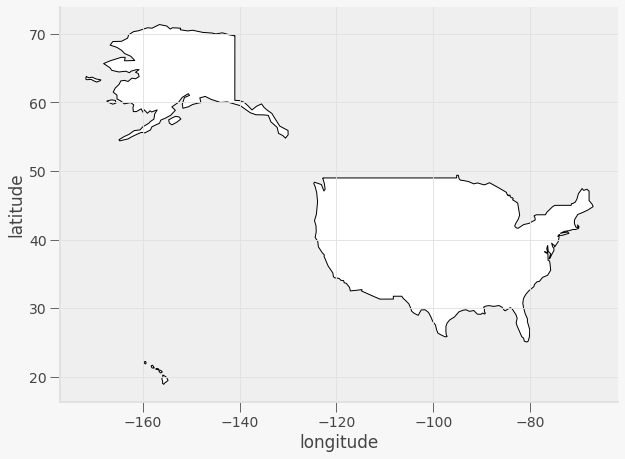

In [13]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

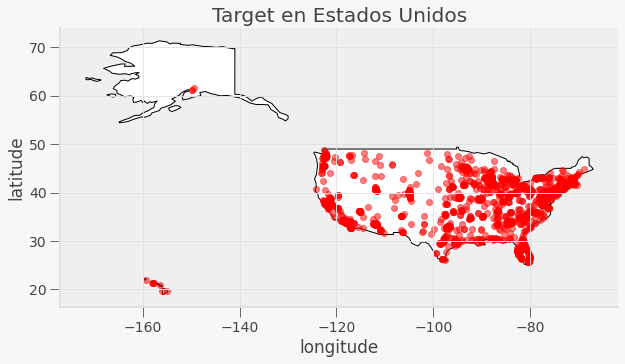

In [14]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes.

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.


**-----------------------------------------------------------------------------------------------------------------------**

**COMIENZA TAREA**

In [15]:
#tu código aquí

#Librerías necesarias

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

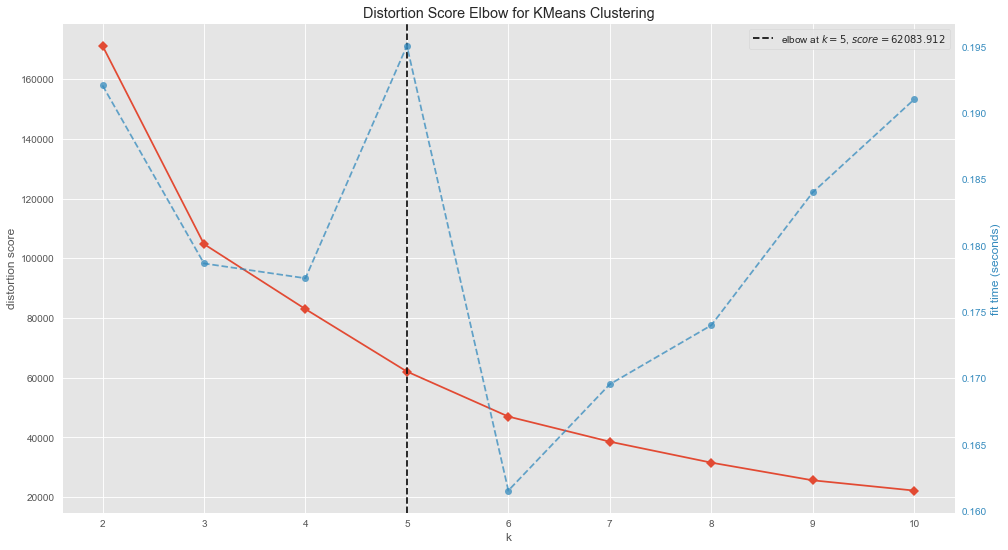

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
#Primero obtenemos la k óptima:

X = np.array(df[["latitude","longitude"]])

modelo = KMeans(random_state=42)

visualizador = KElbowVisualizer(modelo, k=(2,11))
visualizador.fit(X)    
visualizador.show() 

Esta gráfica nos presenta el score de distorción. Esta distorción no es mas que la suma de los errores cuadrados (SSE). Es bun buen indicador para determinar dónde podemos identificar una k óptima para el número de clústers.

En este caso es 5

Usando la gráfica de silueta para determinar si el 5 es el número óptimo de clústers:


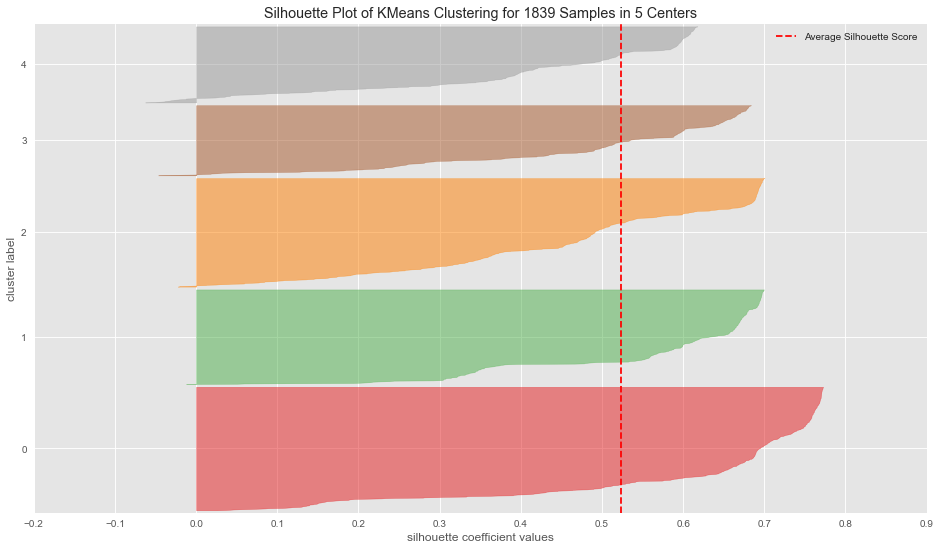

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1839 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [17]:
def KMeans_cluster(data, k):
    # 2. initialize the model
    my_kmeans = KMeans(n_clusters= k)
    # 3. fit the model to the data
    my_kmeans.fit(data) # pass your scaled data here
    # 4. obtain the cluster output
    clusters = my_kmeans.predict(data) # pass your scaled data here
    centroids = my_kmeans.cluster_centers_
    return clusters,  pd.DataFrame(centroids)
    
    model_5clust = KMeans(n_clusters = 5, random_state=42)


model_5clust = KMeans(n_clusters = 5, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_5clust)
sil_visualizer.fit(X)    
sil_visualizer.show()




In [18]:
dfClusters = df[["latitude", "longitude"]]

clusters, centroids = KMeans_cluster(dfClusters, 5)
dfClusters["cluster"] = clusters 
centroids


C:\Users\aleja\AppData\Local\Temp/ipykernel_30764/2615086262.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfClusters["cluster"] = clusters


,0,1
0,37.579774,-119.176343
1,41.759472,-88.760768
2,40.342401,-75.652554
3,31.126921,-82.886849
4,33.940343,-98.373568


Sin embargo, cuando hacemos la gráfica de silueta, podemos ver que el promedio de los coeficientes (que indican la calidad del agrupamiento de los elementos hacia el centroide) apenas es mayor a 0.52 y además, cuando calculamos con k=2 tenemos un coeficiente de agrupamiento superior al 0.6

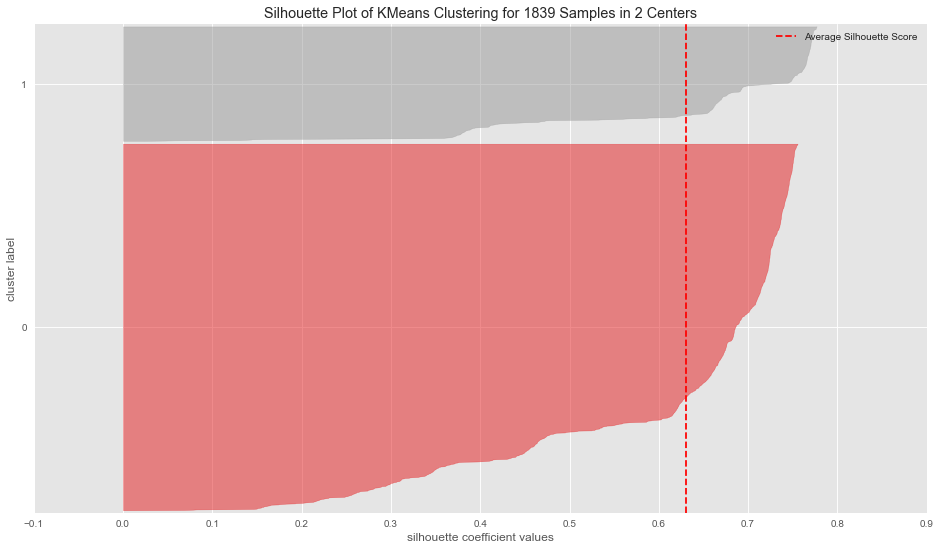

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1839 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [19]:
model_2clust = KMeans(n_clusters = 2, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_2clust)
sil_visualizer.fit(X)    
sil_visualizer.show()

- Encuentra el numero ideal de almacenes, justifica tu respuesta:


De acuerdo a la tabla anterior, el cluster con mayor número de tiendas es el **0 (cero)** con **480** seguido por el cluster **2** con **422**. Mi número óptimo de acuerdo a la gráfica de codo y silueta es **5** clusters.

Trabajaré entonces con 5 como k óptima debido a los datos ofrecidos por la gráfica de codo. 


Ahora procederé a mapearlas de acuerdo a su longitud y latitud

In [20]:
# Quiero obtener ahora el número total de tiendas por clustere
# ClustersdfClusters

dfClustersTotal = dfClusters.groupby(["cluster"]).size().reset_index(name="Totales")
dfClustersTotal = dfClustersTotal.sort_values(by="Totales", ascending=False)

dfClustersTotal.head()
print(dfClusters)

       latitude   longitude  cluster
0     33.224225  -86.804174        3
1     33.334550  -86.989778        3
2     30.602875  -87.895932        3
3     34.560148  -86.971559        3
4     31.266061  -85.446422        3
...         ...         ...      ...
1834  43.034293  -88.176840        1
1835  42.989604  -88.259806        1
1836  42.846799 -106.264166        4
1837  41.162019 -104.800048        4
1838  43.469617 -110.789456        0

[1839 rows x 3 columns]



Encuentra las latitudes y longitudes de los almacenes, ¿qué ciudad es?, ¿a cuantas tiendas va surtir?, ¿sabes a que distancia estará?
¿Cómo elegiste el número de almacenes?, justifica tu respuesta técnicamente.

C:\Users\aleja\AppData\Local\Temp/ipykernel_30764/3797025173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfClusters["Coordinates"] = list(zip(dfClusters.longitude, dfClusters.latitude))
C:\Users\aleja\AppData\Local\Temp/ipykernel_30764/3797025173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfClusters["Coordinates"] = dfClusters["Coordinates"].apply(Point)


<GeoAxesSubplot:>

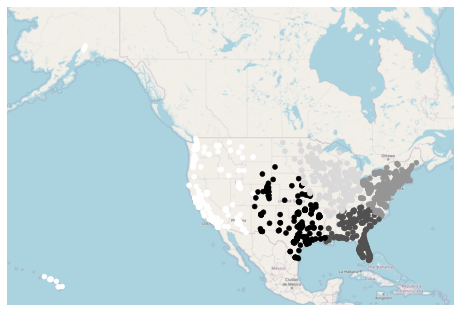

In [21]:
dfClusters["Coordinates"] = list(zip(dfClusters.longitude, dfClusters.latitude))
dfClusters["Coordinates"] = dfClusters["Coordinates"].apply(Point)

import geoplot.crs as gcrs
import geoplot as gplt
import mapclassify as mc

contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))


gdf = geopandas.GeoDataFrame(
    dfClusters, geometry=geopandas.points_from_xy(dfClusters.longitude, dfClusters.latitude))

scheme = mc.Quantiles(gdf['cluster'], k=5)


ax = gplt.webmap(gdf, projection=gcrs.WebMercator())
gplt.pointplot(gdf,  hue='cluster', ax=ax, scheme=scheme)  

En este mapa pueden apreciarse los 5 clusters generados con Kmeans. Queda muy claro que existe un cluster que atendería a la costa Oeste (Incluyendo Honolulú y Alaska), la parte media de EEUU, la parte norte y la sección de la costa Este.


Las ciudades centroides son: 


C:\Users\aleja\AppData\Local\Temp/ipykernel_30764/1484427665.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfClusters["cluster"] = clusters


31.13905624109091, -82.96067795672727
5381, Five Mile Still Road, Clinch County, Georgia, 31635, United States
37.57977423831522, -119.17634307255435
Iron Lake Trail, Madera County, California, United States
40.34240110041322, -75.6525535053719
North Funk Road, Gabelsville, Colebrookdale Township, Berks County, Pennsylvania, 19512, United States
33.96581359819495, -98.4265095631769
River Road, Wichita County, Texas, 76305, United States
41.77295910827586, -88.76508851931034
672, East Garfield Street, Waterman, Clinton Township, DeKalb County, Illinois, 60556, United States


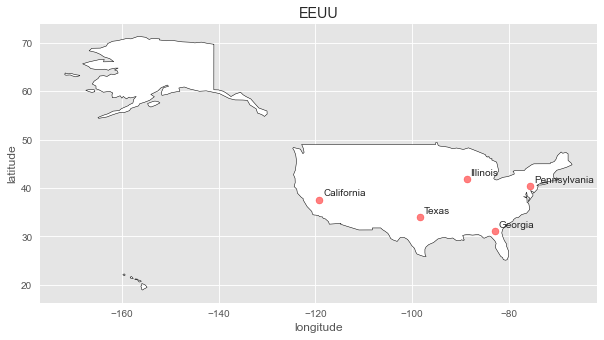

In [22]:
dfClusters = df[["latitude", "longitude"]]
clusters, centroids = KMeans_cluster(dfClusters, 5)
dfClusters["cluster"] = clusters 



from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="geoapiExercises")



def _reversa(latitud, longitud):
    coord =f"{latitud}, {longitud}"
    print(coord)
    location = geolocator.reverse(coord)
    print(location)
    dir = location.raw['address']
    state = dir.get('state', '')
    return state 


centroids = centroids.rename(columns={0:"latitude", 1:"longitude"})

centroids["state"] = centroids.apply(lambda x: _reversa(x['latitude'], x['longitude']), axis=1)
centroids

gdf = geopandas.GeoDataFrame(
    centroids, geometry=geopandas.points_from_xy(centroids.longitude, centroids.latitude))

fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

gdf.plot(ax=gax, color='red', alpha = 0.5)



gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('EEUU')


gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)


# Label the cities
for x, y, label in zip(centroids['longitude'], centroids['latitude'], centroids['state']):
    gax.annotate(label, xy=(x,y), xytext=(4,4), textcoords='offset points')

plt.show() 



Resulta entonces que las cinco ciudades para distribuir los productos son: **California, Texas, Illinois, Georgia y Pennsylvania**



Para las distancias a cada centroide tenemos lo siguiente:

c:\Users\aleja\.conda\envs\geo\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


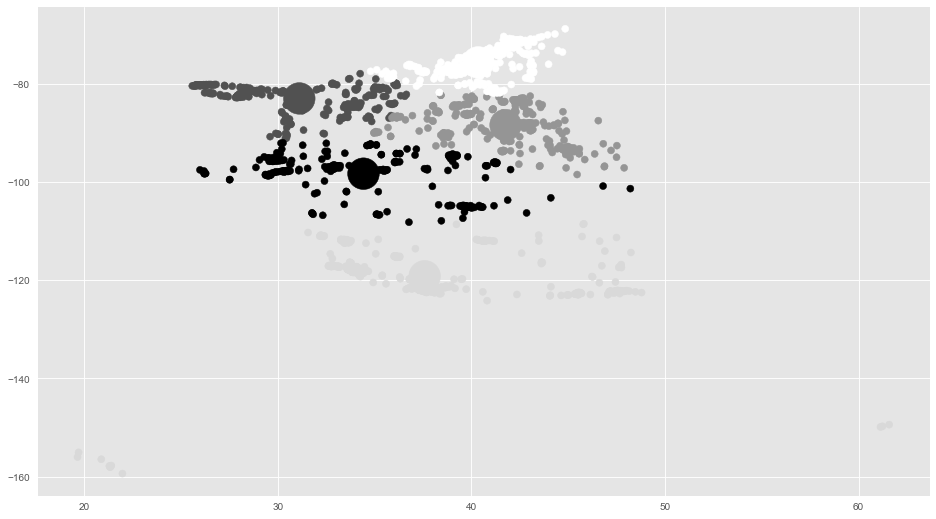

In [23]:
from scipy.spatial import distance_matrix

# get centroids
centroids = model_5clust.cluster_centers_
dfPreds = df[["latitude", "longitude"]]

preds = model_5clust.predict(dfPreds)
centroids = model_5clust.cluster_centers_

plt.scatter(dfPreds["latitude"], dfPreds["longitude"], c=preds)
plt.scatter(centroids[:,0], centroids[:,1], c=range(centroids.shape[0]), s=1000)



Ahora las distancias:

In [24]:
from scipy.spatial.distance import cdist
dm = cdist(dfPreds, centroids)

dfDistancias = pd.DataFrame(dm)

print("Distancias de cada cluster (columnas) a cada almacén (filas)")
print(dfDistancias)

Distancias de cada cluster (columnas) a cada almacén (filas)
              0          1          2          3          4
0     13.287375  32.663866   8.675150   4.413729  11.524405
1     13.386362  32.465319   8.534978   4.629519  11.328714
2     15.698404  32.049045  11.166201   4.988067  11.050723
3     12.771095  32.346039   7.331199   5.315523  11.295643
4     13.403312  34.315748  10.889206   2.518555  13.202265
...         ...        ...        ...        ...        ...
1834  12.876023  31.475720   1.287045  13.031919  13.266418
1835  12.947963  31.386279   1.233644  13.024729  13.174318
1836  30.781035  13.945102  17.942155  26.119618  11.617668
1837  29.226427  14.815882  16.455924  24.069260   9.388258
1838  35.342888  10.248420  22.499552  30.477659  15.450489

[1839 rows x 5 columns]


- **¿Qué librerías nos pueden ayudar a graficar este tipo de datos?**

En este ejercicio, las librerías geopandas y geoplot fueron fundamentales para poder tener un entendimiento geográfico de los datos. En otras experiencias, utilicé la plataforma Carto con shapefiles para poder graficar áreas de interes. 

Hasta este ejercicio desconocía que geopandas podía manejar shapefiles y esto fue una grata sorpresa en mi aprendizaje.

- **¿Consideras importante que se grafique en un mapa?, ¿por qué?**

Cuando tenemos datos con latitudes y longitudes tenemos la obligación de integrarlos en un plano geográfico. ¿Por qué? porque la cercanía geográfica ofrece muchísimos datos relevantes que pueden enriquecer nuestros análisis. Además, es posible integrar estos análisis geográficos con datos abiertos. Con esta combinación podemos mencionar algunos análisis prácticos: implementación de nuevas tiendas, detectar zonas socioeconómicas y predecir comportamiento de masas, segmentación de grupos etarios y su comportamiento en un determinado mercado, en fin, las opciones de análisis son más amplias cuando integramos análisis espacial.

**Agrega las conclusiones**

En este ejercicio con datos ficticios pude aplicar técnicas de aprendizaje no supervisado mediante el algoritmo k-means y además fue posible entregar valor a la compañía ficticia, pues fue posible identificar 5 lugares estratégicos (solo en términos de distancia euclidea) para incorporar nuevas tiendas. Esto es de suma importancia, pues sin estos algoritmos las decisiones se dejarán a la suerte de la sensación y la percepción humana.

Las librerías primordiales para este ejercicio fueron geopandas, geoplot y sklearn importando las funciones para el cálculo del algoritmo kmeans.


En este ejercicio, las librerías geopandas y geoplot fueron fundamentales para poder tener un entendimiento geográfico de los datos. En otras experiencias, utilicé la plataforma Carto con shapefiles para poder graficar áreas de interes. 

Hasta este ejercicio desconocía que geopandas podía manejar shapefiles y esto fue una grata sorpresa en mi aprendizaje.